# Mass Transports

Transport diagnostics for flow through major straits.

## Theory

Formally, mass transports are given by
$$T_x = \rho u  $$
$$T_y = \rho v  $$

Mass transports are diagnostics that are calculated online by the model:

|variable|long name|units|dimensions|
|-|
|tx_trans|T-cell i-mass transport|Sv|(time,st_ocean,xu_ocean,yt_ocean)|
|ty_trans|T-cell j-mass transport|Sv|(time,st_ocean,xt_ocean,yu_ocean)|


These variables are saved in `ocean.nc` files.

## Calculation

In [1]:
%matplotlib inline
%pylab inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
from collections import OrderedDict


from dask.distributed import Client
import climtas.nci

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata

import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

Populating the interactive namespace from numpy and matplotlib
Available exptdata keys:  ['01deg']


In [2]:
import climtas.nci
climtas.nci.GadiClient(malloc_trim_threshold='64kib')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/45493/status,
Dashboard: /proxy/45493/status,Workers: 8
Total threads: 8,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40487,Workers: 8
Dashboard: /proxy/45493/status,Total threads: 8
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://10.6.122.8:43619,Total threads: 1
Dashboard: /proxy/41357/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:37937,


In [3]:
session = cc.database.create_session()

In [4]:
data = copy.deepcopy(exptdata.exptdict)  # to store fields under the same keys as exptdata.exptdict

In [5]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

### find location

In [6]:
# Strait locations: [minlon, maxlon, minlat, maxlat]
# Add as many as you like, but they must be zonal or meridional

data['1deg_c2']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('AB', [-212, -208, -43.5, -43.5]),
            ('BC', [-208, -189, -43.5, -43.5]),   
            ('FE', [-206.5, -202, -28, -28]),
            ('ED', [-202, -187, -28, -28]),
            ('DG', [-187, -187, -34.4, -28]),
            ('LM', [-182, -177, -37.5, -37.5])])
data['025deg_c2']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('AB', [-212.5, -210.7, -43.5, -43.5]),
            ('BC', [-210.7, -189, -43.5, -43.5]),
            ('FE', [-206.5, -205, -28, -28]),
            ('ED', [-205, -187, -28, -28]),
            ('DG', [-187, -187, -34.4, -28]),
            ('LM', [-182, -179.5, -37.5, -37.5])])
data['01deg_c2']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('AB', [-212.5, -210.2, -43.5, -43.5]),
            ('BC', [-210.2, -189, -43.5, -43.5]),
            ('FE', [-206.5, -205.2, -28, -28]),
            ('ED', [-205.2, -187, -28, -28]),
            ('DG', [-187, -187, -34.4, -28]),
            ('LM', [-181, -179.6, -37.5, -37.5])])

KeyError: '01deg_c2'

In [8]:
data['01deg']['straits'] = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('AB', [-212.5, -210.2, -43.5, -43.5]),
            ('BC', [-210.2, -189, -43.5, -43.5]),
            ('FE', [-206.5, -205.2, -28, -28]),
            ('ED', [-205.2, -187, -28, -28]),
            ('DG', [-187, -187, -34.4, -28]),
            ('LM', [-181, -179.6, -37.5, -37.5])])

In [9]:
# # Strait locations: [minlon, maxlon, minlat, maxlat]
# # Add as many as you like, but they must be zonal or meridional

# data['1deg_c1']['straits'] = OrderedDict([('Lombok Strait', [-245, -242, -8.33, -8.33]),
#                                           ('Ombai Strait',  [-237, -237, -10.33, -8.33]),
#                                           ('Timor Strait',  [-233, -233, -13.9, -9])])
# data['025deg_c1']['straits'] = OrderedDict([('Lombok Strait', [-244.5, -243.5, -8.22, -8.22]),
#                                          ('Ombai Strait',  [-235.5, -235.5, -9.21, -8.47]),
#                                          ('Timor Strait',  [-233, -233, -13.86, -8.71])])
# data['01deg_c1']['straits'] = OrderedDict([('Lombok Strait', [-244.3, -243.8, -8.37, -8.37]),
#                                         ('Ombai Strait',  [-234.9, -234.9, -8.86, -8.27]),
#                                         ('Timor Strait',  [-232.6, -232.6, -13.96, -8.37])])


# data['1deg_c2']['straits'] = OrderedDict([('Lombok Strait', [-245, -242, -8.33, -8.33]),
#                                        ('Ombai Strait',  [-237, -237, -10.33, -8.33]),
#                                        ('Timor Strait',  [-233, -233, -13.9, -9])])
# data['025deg_c2']['straits'] = OrderedDict([('Lombok Strait', [-244.5, -243.5, -8.22, -8.22]),
#                                          ('Ombai Strait',  [-235.5, -235.5, -9.21, -8.47]),
#                                          ('Timor Strait',  [-233, -233, -13.86, -8.71])])
# data['01deg_c2']['straits'] = OrderedDict([('Lombok Strait', [-244.3, -243.8, -8.37, -8.37]),
#                                         ('Ombai Strait',  [-234.9, -234.9, -8.86, -8.27]),
#                                         ('Timor Strait',  [-232.6, -232.6, -13.96, -8.37])])


# data['1deg_c3']['straits'] = OrderedDict([('Lombok Strait', [-245, -242, -8.33, -8.33]),
#                                        ('Ombai Strait',  [-237, -237, -10.33, -8.33]),
#                                        ('Timor Strait',  [-233, -233, -13.9, -9])])
# data['025deg_c3']['straits'] = OrderedDict([('Lombok Strait', [-244.5, -243.5, -8.22, -8.22]),
#                                          ('Ombai Strait',  [-235.5, -235.5, -9.21, -8.47]),
#                                          ('Timor Strait',  [-233, -233, -13.86, -8.71])])
# data['01deg_c3']['straits'] = OrderedDict([('Lombok Strait', [-244.3, -243.8, -8.37, -8.37]),
#                                         ('Ombai Strait',  [-234.9, -234.9, -8.86, -8.27]),
#                                         ('Timor Strait',  [-232.6, -232.6, -13.96, -8.37])])

### load data

In [6]:
# ITF:1958.1-2018.12, AB-LM:1994-2009.

In [9]:
tstart = pd.to_datetime('1958/01/01')
tend = pd.to_datetime('2019/01/01')

In [10]:
# load data
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    e['tx_trans'] = cc.querying.getvar(e['expt'],'tx_trans', session,
                                      start_time=str(tstart.year), 
                                      end_time=str(tend.year)).sel(time=slice(tstart,tend))
    
    e['ty_trans'] = cc.querying.getvar(e['expt'],'ty_trans', session,
                                       start_time=str(tstart.year), 
                                       end_time=str(tend.year)).sel(time=slice(tstart,tend))
#     if 'tx_trans_int_z' not in e:
#         e['tx_trans_int_z'] = cc.querying.getvar(e['expt'],'tx_trans_int_z', session,
#                                                 frequency = '1 monthly',
#                                                 start_time='1958-01-01 00:00:00', 
#                                                 end_time='2018-12-31 00:00:00')
#         e['ty_trans_int_z'] = cc.querying.getvar(e['expt'],'ty_trans_int_z', session,
#                                                 frequency = '1 monthly',
#                                                 start_time='1958-01-01 00:00:00', 
#                                                 end_time='2018-12-31 00:00:00')
# # full depth transport
#     e['tx_trans_int_z'] = cc.querying.getvar(e['expt'],'tx_trans_int_z', session,
#                                              frequency = '1 monthly',
#                                              start_time=str(tstart.year), 
#                                              end_time=str(tend.year)).sel(time=slice(tstart,tend))
    
#     e['ty_trans_int_z'] =  e['ty_trans'].sum('st_ocean')
        
# 0-2000m transport      
    e['tx_trans_int_2000'] = e['tx_trans'].sel(st_ocean=slice(0,2000)).sum('st_ocean')
    e['ty_trans_int_2000'] = e['ty_trans'].sel(st_ocean=slice(0,2000)).sum('st_ocean')

01deg


In [12]:
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    
    e['u'] = cc.querying.getvar(e['expt'],'u', session, frequency = '1 monthly',
                                start_time=str(tstart.year), 
                                end_time=str(tend.year)).sel(time=slice(tstart,tend)))
    e['v'] = cc.querying.getvar(e['expt'],'v', session, frequency = '1 monthly',
                                start_time=str(tstart.year), 
                                end_time=str(tend.year)).sel(time=slice(tstart,tend))

SyntaxError: unmatched ')' (1699347107.py, line 7)

distributed.utils_perf - WARNING - full garbage collections took 21% CPU time recently (threshold: 10%)


### Map 

1deg_c1
AB
BC
FE
ED
DG
LM
025deg_c1
AB
BC
FE
ED
DG
LM
01deg_c1
AB
BC
FE
ED
DG
LM
1deg_c2
AB
BC
FE
ED
DG
LM
025deg_c2
AB
BC
FE
ED
DG
LM
01deg_c2
AB
BC
FE
ED
DG
LM
1deg_c3
AB
BC
FE
ED
DG
LM
025deg_c3
AB
BC
FE
ED
DG
LM
01deg_c3
AB
BC
FE
ED
DG
LM


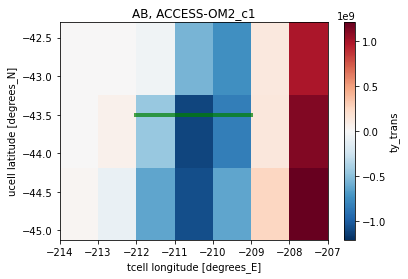

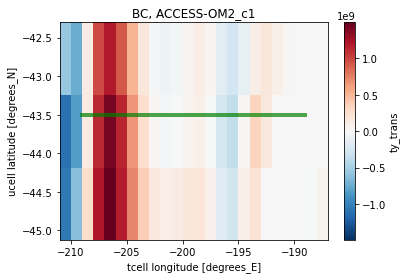

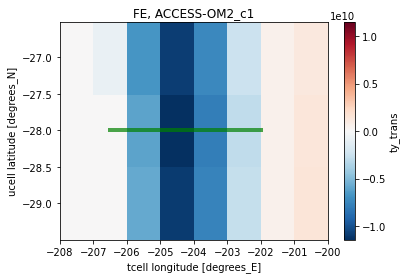

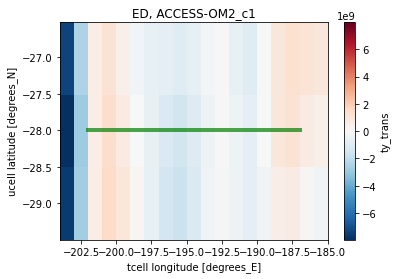

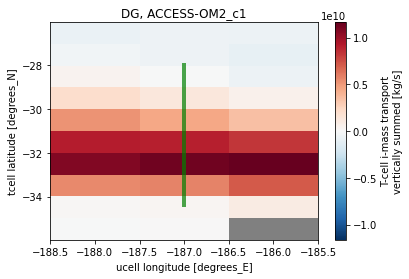

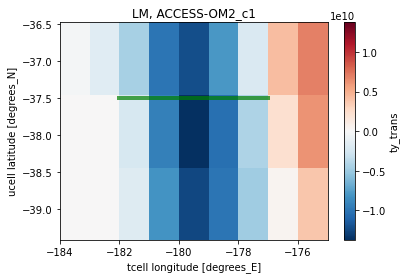

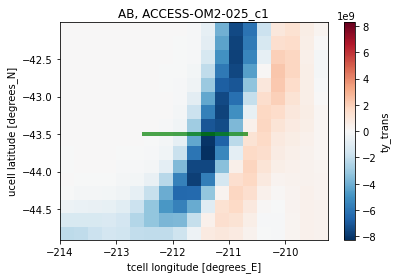

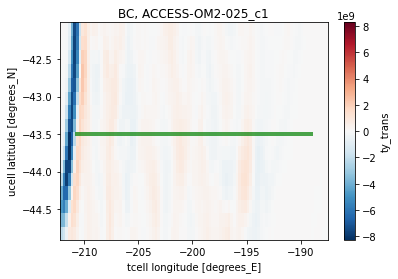

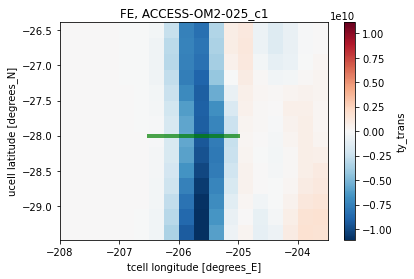

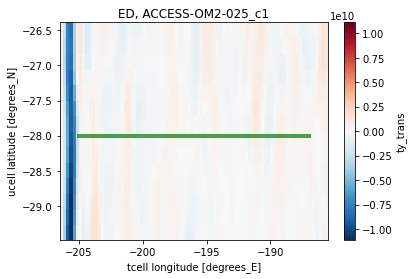

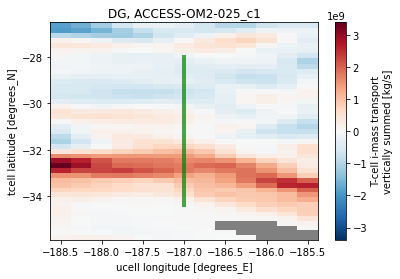

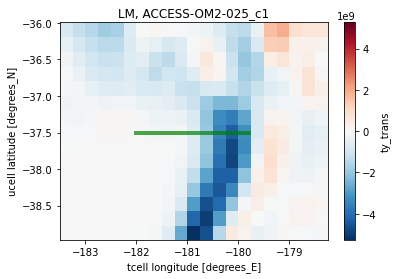

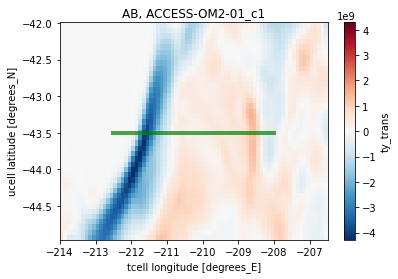

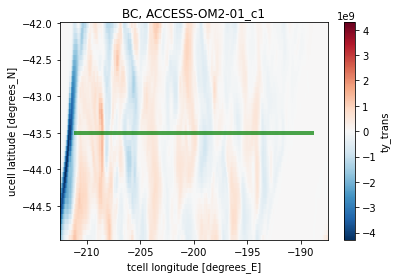

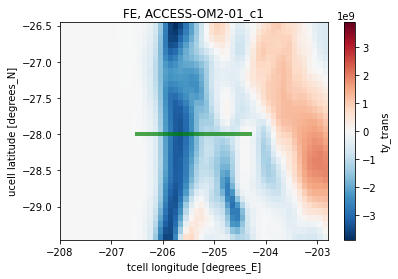

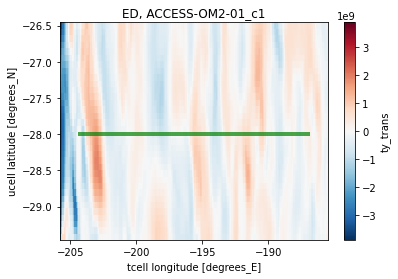

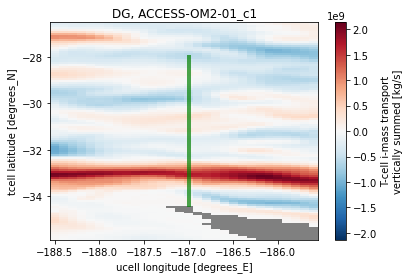

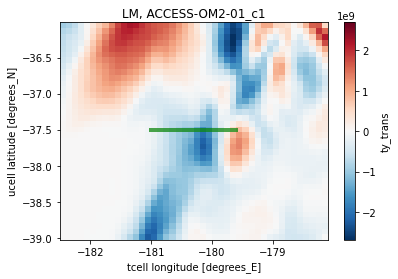

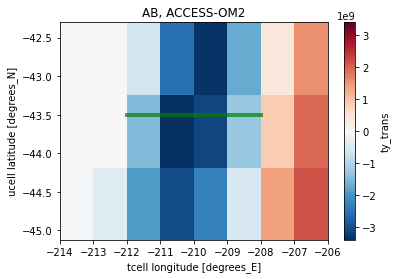

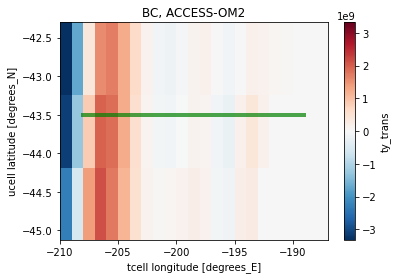

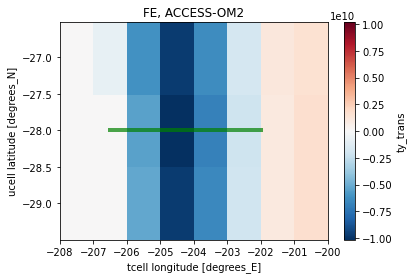

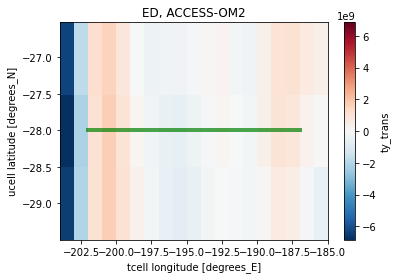

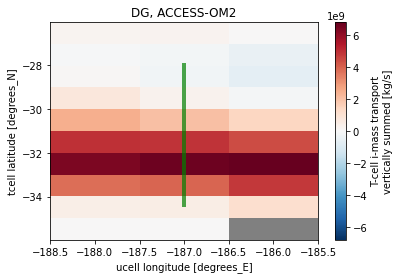

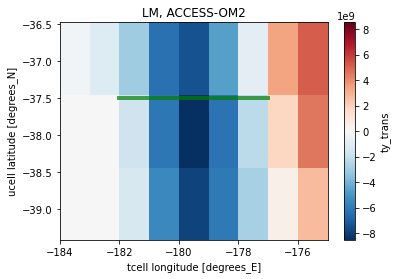

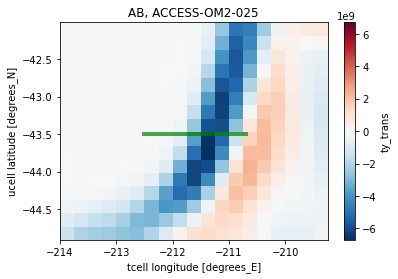

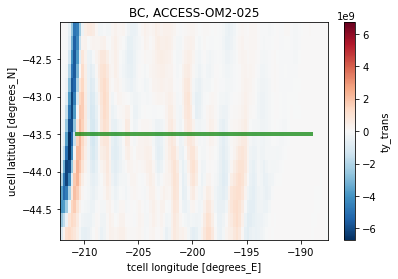

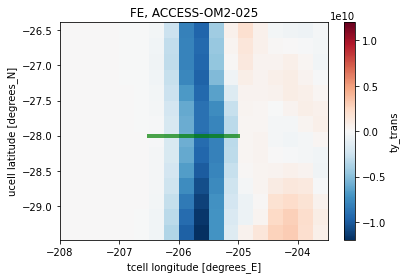

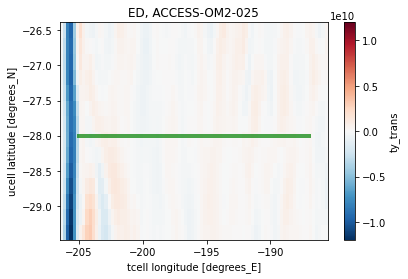

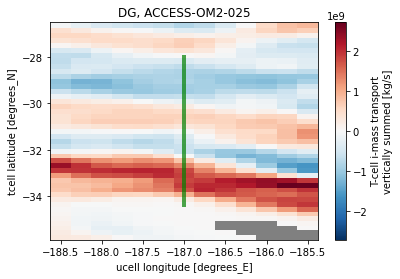

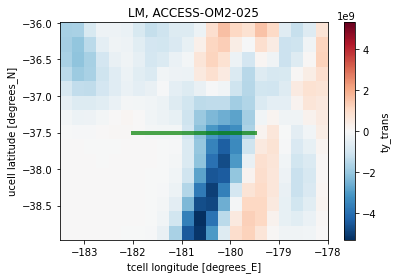

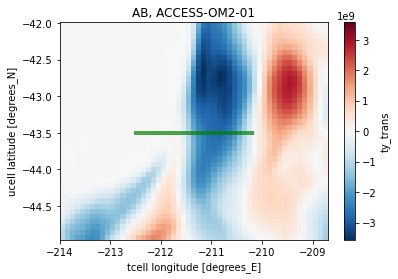

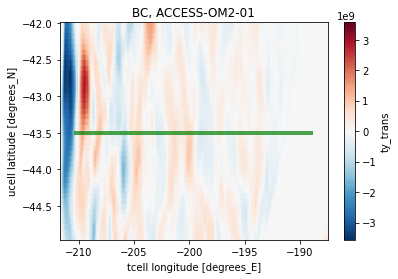

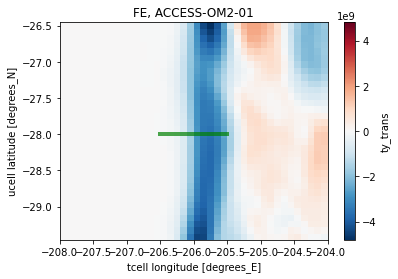

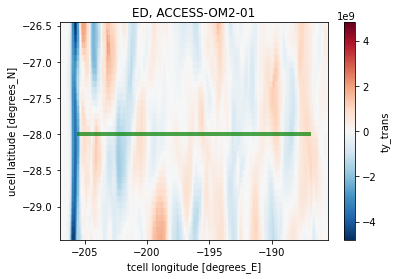

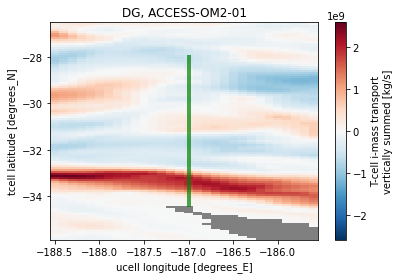

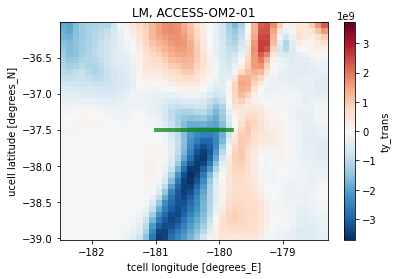

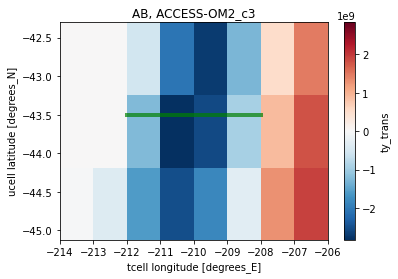

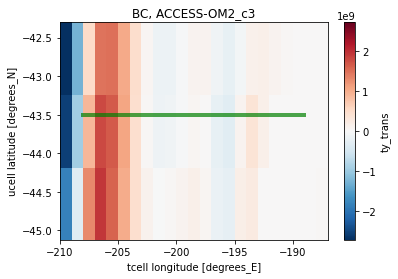

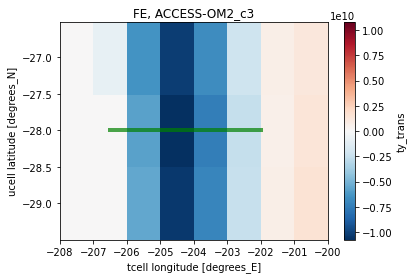

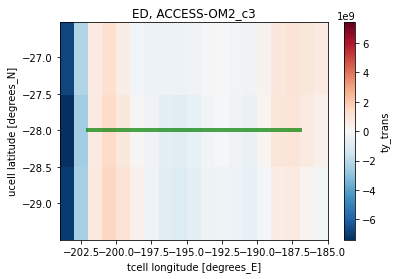

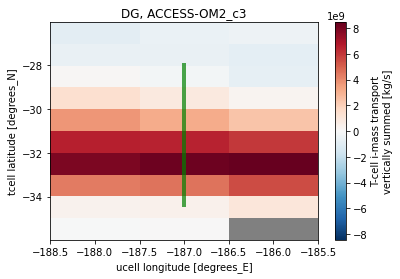

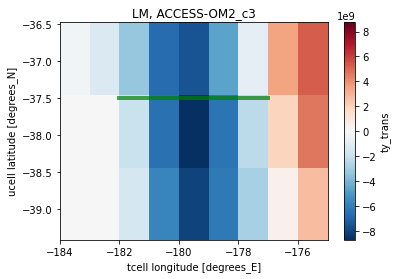

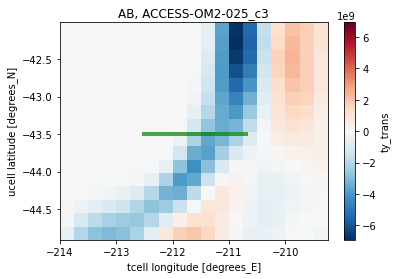

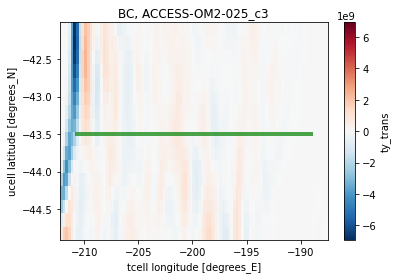

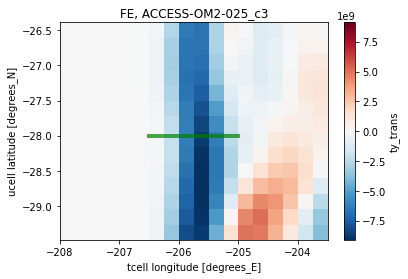

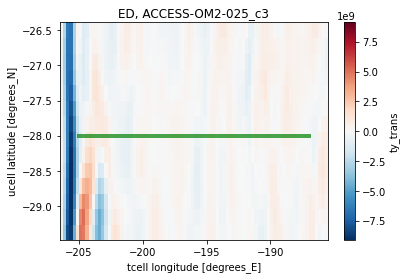

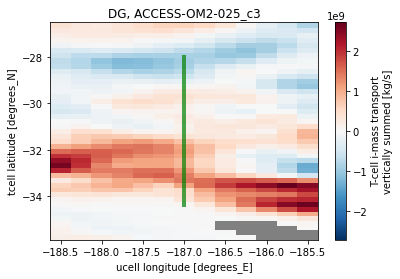

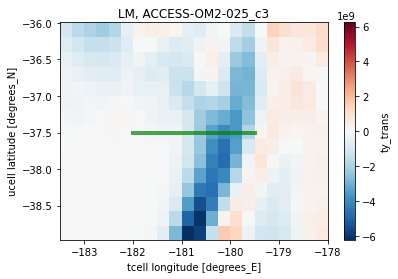

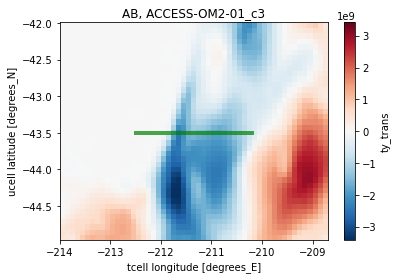

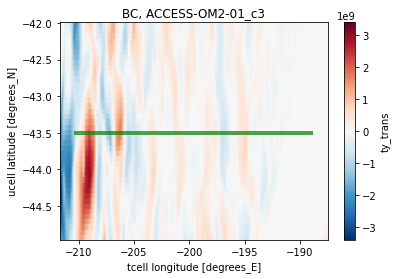

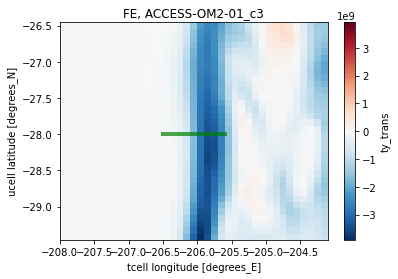

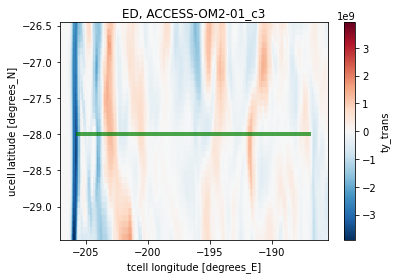

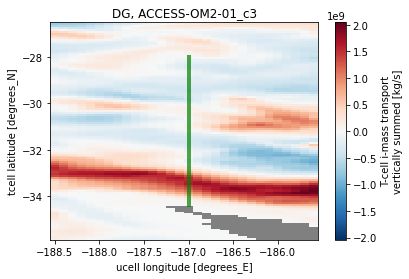

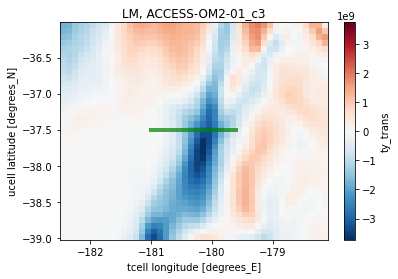

In [15]:
# plot maps of transect locations (just final time shown), full depth
m = 1.5 # margin (degrees)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        print(strait)
        fig, ax = plt.subplots(nrows=1, ncols=1)
        ax.set_facecolor('gray')  # gray land points
        if xmin == xmax:
            e['tx_trans_int_z'].isel(time=-1)\
                                .sel(xu_ocean=slice(xmin-m, xmax+m))\
                                .sel(yt_ocean=slice(ymin-m, ymax+m))\
                                .plot()

        elif ymin == ymax:
            e['ty_trans_int_z'].isel(time=-1)\
                                .sel(xt_ocean=slice(xmin-m, xmax+m))\
                                .sel(yu_ocean=slice(ymin-m, ymax+m))\
                                .plot()
        else:
            raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        plt.plot([xmin, xmax], [ymin, ymax],
                color='green', linewidth=4, alpha=0.7)
        plt.title(strait+', '+e['desc'])

In [12]:
# # plot maps of transect locations (just final time shown), 0-2000m
# m = 1.5 # margin (degrees)
# for ekey in data.keys():
#     print(ekey)
#     e = data[ekey]
#     for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
#         print(strait)
#         fig, ax = plt.subplots(nrows=1, ncols=1)
#         ax.set_facecolor('gray')  # gray land points
#         if xmin == xmax:
#             e['tx_trans_int_2000'].isel(time=-1)\
#                                 .sel(xu_ocean=slice(xmin-m, xmax+m))\
#                                 .sel(yt_ocean=slice(ymin-m, ymax+m))\
#                                 .plot()

#         elif ymin == ymax:
#             e['ty_trans_int_2000'].isel(time=-1)\
#                                 .sel(xt_ocean=slice(xmin-m, xmax+m))\
#                                 .sel(yu_ocean=slice(ymin-m, ymax+m))\
#                                 .plot()
#         else:
#             raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
#         plt.plot([xmin, xmax], [ymin, ymax],
#                 color='green', linewidth=4, alpha=0.7)
#         plt.title(strait+', '+e['desc'])

1deg
AB
BC
FE
ED
DG
LM
025deg
AB
BC
FE
ED
DG
LM
01deg
AB
BC
FE
ED
DG
LM


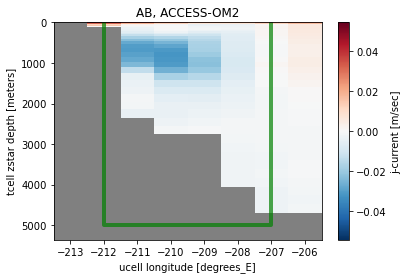

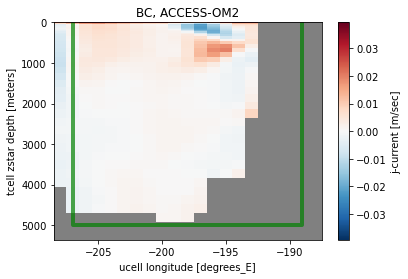

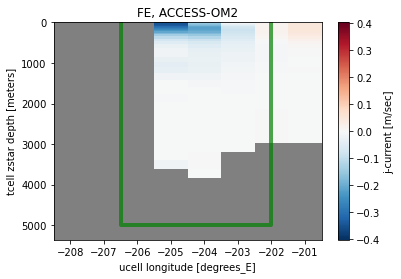

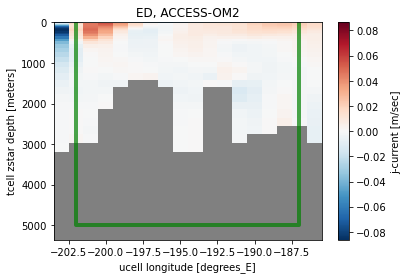

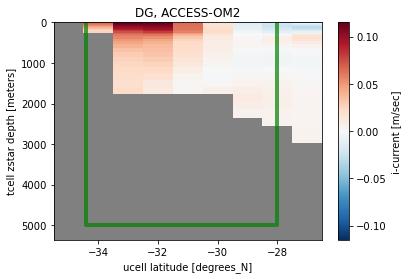

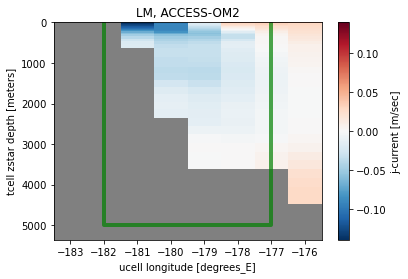

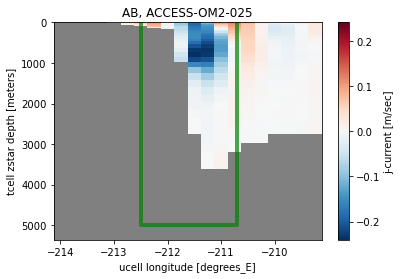

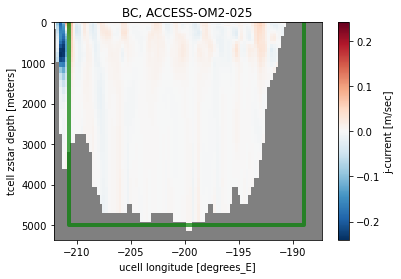

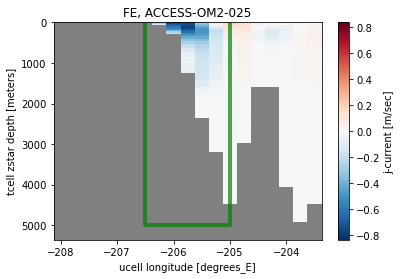

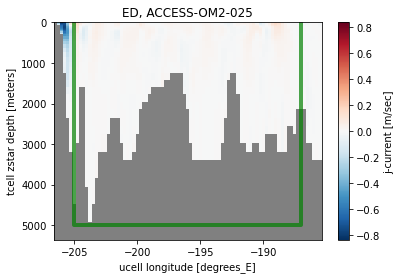

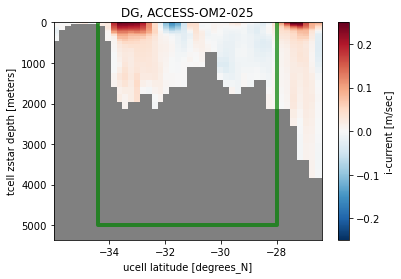

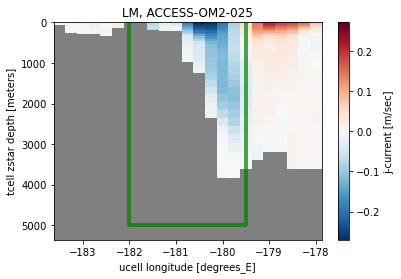

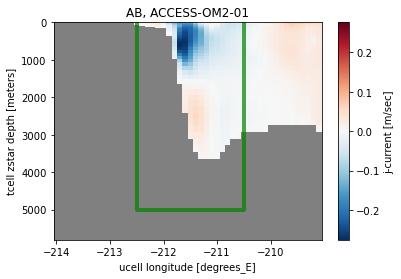

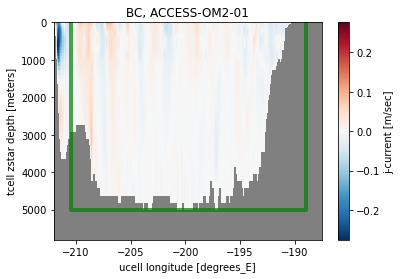

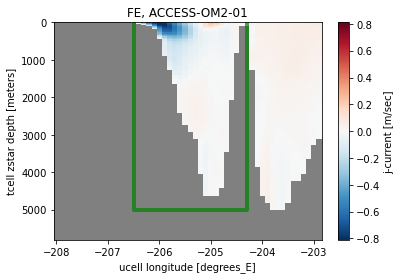

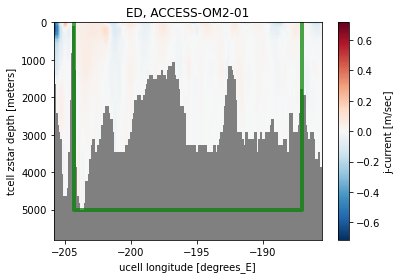

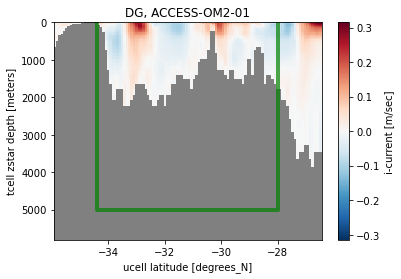

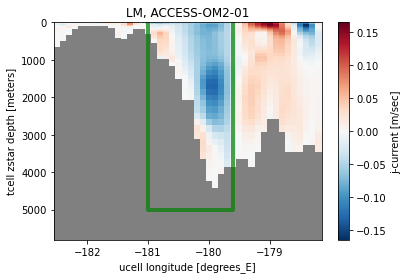

In [19]:
# plot vertical slices at transect locations
m = 1.5 # margin (degrees)
for ekey in data.keys():
    print(ekey)
    e = data[ekey]
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        print(strait)
        fig, ax = plt.subplots(nrows=1, ncols=1)
        ax.set_facecolor('gray')  # gray land points
        if xmin == xmax:
            e['u'].isel(time=-1)\
                                .sel(xu_ocean=xmin, method='nearest')\
                                .sel(yu_ocean=slice(ymin-m, ymax+m))\
                                .plot()
            plt.plot([ymin, ymin, ymax, ymax], [0, 5000, 5000, 0],
                color='green', linewidth=4, alpha=0.7)
        elif ymin == ymax:
            e['v'].isel(time=-1)\
                                .sel(xu_ocean=slice(xmin-m, xmax+m))\
                                .sel(yu_ocean=ymin, method='nearest')\
                                .plot()
            plt.plot([xmin, xmin, xmax, xmax], [0, 5000, 5000, 0],
                color='green', linewidth=4, alpha=0.7)
        else:
            raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
        plt.title(strait+', '+e['desc'])
        plt.gca().invert_yaxis()

# Transport

### strait

In [11]:
# for AB-LM
St = 'AB'

for ekey in data.keys():
    e = data[ekey]
    e['transport'] = dict()
    e['transport_mean'] = dict()
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == St:
            if strait not in e['transport']:
                if xmin == xmax:
                    e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                        .sel(time=slice(tstart,tend))\
                                        .sel(yt_ocean=slice(ymin, ymax))\
                                        .sum('yt_ocean')
                elif ymin == ymax:
                    e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                        .sel(time=slice(tstart,tend))\
                                        .sel(xt_ocean=slice(xmin, xmax))\
                                        .sum('xt_ocean')
                else:
                    raise ValueError('Transports are computed only along lines of either constant latitude or longitude')

            print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')

            if strait not in e['transport_mean']:
                e['transport_mean'][strait] = e['transport'][strait]
                #.resample(time='A').mean('time')

AB -10.997696741312742 Sv


In [12]:
# for AB-LM
St = 'BC'

for ekey in data.keys():
    e = data[ekey]
    e['transport'] = dict()
    e['transport_mean'] = dict()
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == St:
            if strait not in e['transport']:
                if xmin == xmax:
                    e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                        .sel(time=slice(tstart,tend))\
                                        .sel(yt_ocean=slice(ymin, ymax))\
                                        .sum('yt_ocean')
                elif ymin == ymax:
                    e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                        .sel(time=slice(tstart,tend))\
                                        .sel(xt_ocean=slice(xmin, xmax))\
                                        .sum('xt_ocean')
                else:
                    raise ValueError('Transports are computed only along lines of either constant latitude or longitude')

            print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')

            if strait not in e['transport_mean']:
                e['transport_mean'][strait] = e['transport'][strait]
                #.resample(time='A').mean('time')

BC 4.57275650965251 Sv


In [13]:
# for AB-LM
St = 'FE'

for ekey in data.keys():
    e = data[ekey]
    e['transport'] = dict()
    e['transport_mean'] = dict()
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == St:
            if strait not in e['transport']:
                if xmin == xmax:
                    e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                        .sel(time=slice(tstart,tend))\
                                        .sel(yt_ocean=slice(ymin, ymax))\
                                        .sum('yt_ocean')
                elif ymin == ymax:
                    e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                        .sel(time=slice(tstart,tend))\
                                        .sel(xt_ocean=slice(xmin, xmax))\
                                        .sum('xt_ocean')
                else:
                    raise ValueError('Transports are computed only along lines of either constant latitude or longitude')

            print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')

            if strait not in e['transport_mean']:
                e['transport_mean'][strait] = e['transport'][strait]
                #.resample(time='A').mean('time')

FE -17.3884075984556 Sv


In [14]:
# for AB-LM
St = 'ED'

for ekey in data.keys():
    e = data[ekey]
    e['transport'] = dict()
    e['transport_mean'] = dict()
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == St:
            if strait not in e['transport']:
                if xmin == xmax:
                    e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                        .sel(time=slice(tstart,tend))\
                                        .sel(yt_ocean=slice(ymin, ymax))\
                                        .sum('yt_ocean')
                elif ymin == ymax:
                    e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                        .sel(time=slice(tstart,tend))\
                                        .sel(xt_ocean=slice(xmin, xmax))\
                                        .sum('xt_ocean')
                else:
                    raise ValueError('Transports are computed only along lines of either constant latitude or longitude')

            print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')

            if strait not in e['transport_mean']:
                e['transport_mean'][strait] = e['transport'][strait]
                #.resample(time='A').mean('time')

ED 4.12491861003861 Sv


In [15]:
# for AB-LM
St = 'DG'

for ekey in data.keys():
    e = data[ekey]
    e['transport'] = dict()
    e['transport_mean'] = dict()
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == St:
            if strait not in e['transport']:
                if xmin == xmax:
                    e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                        .sel(time=slice(tstart,tend))\
                                        .sel(yt_ocean=slice(ymin, ymax))\
                                        .sum('yt_ocean')
                elif ymin == ymax:
                    e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                        .sel(time=slice(tstart,tend))\
                                        .sel(xt_ocean=slice(xmin, xmax))\
                                        .sum('xt_ocean')
                else:
                    raise ValueError('Transports are computed only along lines of either constant latitude or longitude')

            print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')

            if strait not in e['transport_mean']:
                e['transport_mean'][strait] = e['transport'][strait]
                #.resample(time='A').mean('time')

DG 7.275692972972973 Sv


In [25]:
# for AB-LM
St = 'LM'

for ekey in data.keys():
    e = data[ekey]
    e['transport'] = dict()
    e['transport_mean'] = dict()
    for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
        if strait == St:
            if strait not in e['transport']:
                if xmin == xmax:
                    e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                        .sel(time=slice(tstart,tend))\
                                        .sel(yt_ocean=slice(ymin, ymax))\
                                        .sum('yt_ocean')
                elif ymin == ymax:
                    e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                        .sel(time=slice(tstart,tend))\
                                        .sel(xt_ocean=slice(xmin, xmax))\
                                        .sum('xt_ocean')
                else:
                    raise ValueError('Transports are computed only along lines of either constant latitude or longitude')

            print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')

            if strait not in e['transport_mean']:
                e['transport_mean'][strait] = e['transport'][strait]
                #.resample(time='A').mean('time')

LM -24.128935042471042 Sv
LM -14.98615203088803 Sv
LM -10.340762193050193 Sv


### ITF

In [ ]:
# 需要计算不同strait时，复制改参数即可。

# strait_transport_fulldepth('Lombok Strait')
# strait_transport_fulldepth('Ombai Strait')
# strait_transport_fulldepth('Timor Strait')
# strait_transport_fulldepth('Tasman Sea')

In [ ]:
# St = 'Lombo Strait'

In [ ]:
# # for ITF
# for ekey in data.keys():
#     print(ekey)
#     e = data[ekey]
#     e['transport'] = dict()
#     e['transport_mean'] = dict()
#     for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
#         if strait == St:             
#             if xmin == xmax:
#                 e['transport'][strait] = e['tx_trans_int_z'].sel(xu_ocean=xmin, method='nearest')\
#                                     .sel(time=slice(tstart,tend))\
#                                     .sel(yt_ocean=slice(ymin, ymax))\
#                                     .sum('yt_ocean')
#             elif ymin == ymax:
#                 e['transport'][strait] = e['ty_trans_int_z'].sel(yu_ocean=ymin, method='nearest')\
#                                     .sel(time=slice(tstart,tend))\
#                                     .sel(xt_ocean=slice(xmin, xmax))\
#                                     .sum('xt_ocean')
#             else:
#                 raise ValueError('Transports are computed only along lines of either constant latitude or longitude')
                
#             print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')
            
#             if strait not in e['transport_mean']:
#                 e['transport_mean'][strait] = e['transport'][strait].resample(time='A').mean('time')

## Timeseries

## make plots after calculating the transport data 

In [ ]:
# 在上面的Transport，可以同时计算3个cycle。
# 但在此处画图时，需针对每个cycle单独做图，故需设置i和cycle

In [9]:
c = ['r', 'b' , 'g', 'r', 'b' , 'g']

AB -2.903629590733591 Sv
AB -9.358384432432432 Sv
AB -13.088058316602316 Sv
1deg_c2
025deg_c2
01deg_c2


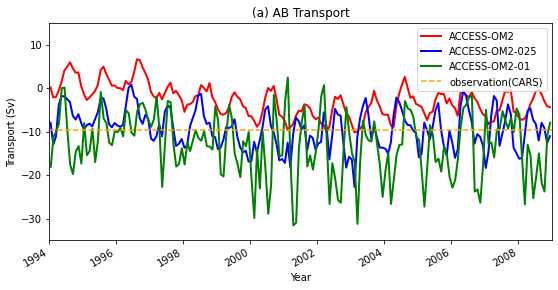

In [10]:
def Strait_Transport_2000(St,obs,tmin,tmax):
    
    fig,ax = plt.subplots(figsize=(9,4))

    for i,ekey in enumerate(data.keys()):
        if 3 <= i and i <= 5:              # set i 
            print(ekey)
            e = data[ekey]
            transport_mean = e['transport_mean'][St]/1e6/1036
            transport_mean.plot(label=e['desc'], color = c[i], linewidth=2)

    ax.plot([tstart,tend],[obs, obs], color = 'orange', linestyle = '--',label="observation(CARS)")
    # ax.legend(fancybox=True, framealpha=0.75)
    ax.legend(loc = 1)
    ax.set_ylim([tmin, tmax])
    ax.set_xlim([pd.datetime(1994,1,1),pd.datetime(2009,1,1)])
    ax.set_title('(a) ' + str(St) + ' Transport')
    ax.set_xlabel('Year')
    ax.set_ylabel('Transport (Sv)')

    savefigure(str(St)+'_transport_'+ 'cycle2')       # set cycle
    
St = 'AB'

for i,ekey in enumerate(data.keys()):
    if 3 <= i and i <= 5: 
    
        e = data[ekey]
        e['transport'] = dict()
        e['transport_mean'] = dict()
        for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
            if strait == St:
                if strait not in e['transport']:
                    if xmin == xmax:
                        e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                            .sel(time=slice(tstart,tend))\
                                            .sel(yt_ocean=slice(ymin, ymax))\
                                            .sum('yt_ocean')
                    elif ymin == ymax:
                        e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                            .sel(time=slice(tstart,tend))\
                                            .sel(xt_ocean=slice(xmin, xmax))\
                                            .sum('xt_ocean')
                    else:
                        raise ValueError('Transports are computed only along lines of either constant latitude or longitude')

                print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')

                if strait not in e['transport_mean']:
                    e['transport_mean'][strait] = e['transport'][strait]
                    #.resample(time='A').mean('time')
                
Strait_Transport_2000('AB',-9.7,-35,15)

BC 3.9732534362934366 Sv
BC 5.005851675675675 Sv
BC 6.089479907335907 Sv
1deg_c2
025deg_c2
01deg_c2


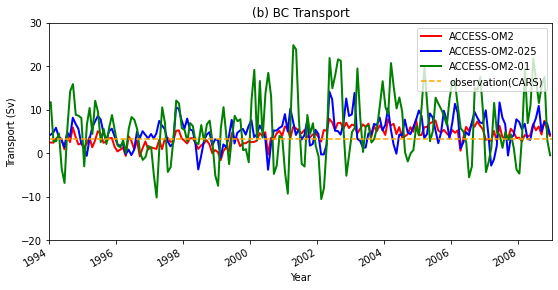

In [11]:
def Strait_Transport_2000(St,obs,tmin,tmax):
    
    fig,ax = plt.subplots(figsize=(9,4))

    for i,ekey in enumerate(data.keys()):
        if 3 <= i and i <= 5:               # set i
            print(ekey)
            e = data[ekey]
            transport_mean = e['transport_mean'][St]/1e6/1036
            transport_mean.plot(label=e['desc'], color = c[i], linewidth=2)

    ax.plot([tstart,tend],[obs, obs],color = 'orange', linestyle = '--',label="observation(CARS)")
    # ax.legend(fancybox=True, framealpha=0.75)
    ax.legend(loc = 1)
    ax.set_ylim([tmin, tmax])
    ax.set_xlim([pd.datetime(1994,1,1),pd.datetime(2009,1,1)])
    ax.set_title('(b) ' + str(St) + ' Transport')
    ax.set_xlabel('Year')
    ax.set_ylabel('Transport (Sv)')

    savefigure(str(St)+'_transport_'+ 'cycle2')       # set cycle
    
St = 'BC'

for i,ekey in enumerate(data.keys()):
    if 3 <= i and i <= 5: 
        e = data[ekey]
        e['transport'] = dict()
        e['transport_mean'] = dict()
        for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
            if strait == St:
                if strait not in e['transport']:
                    if xmin == xmax:
                        e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                            .sel(time=slice(tstart,tend))\
                                            .sel(yt_ocean=slice(ymin, ymax))\
                                            .sum('yt_ocean')
                    elif ymin == ymax:
                        e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                            .sel(time=slice(tstart,tend))\
                                            .sel(xt_ocean=slice(xmin, xmax))\
                                            .sum('xt_ocean')
                    else:
                        raise ValueError('Transports are computed only along lines of either constant latitude or longitude')

                print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')

                if strait not in e['transport_mean']:
                    e['transport_mean'][strait] = e['transport'][strait]
                    #.resample(time='A').mean('time')
                
Strait_Transport_2000('BC',3.2,-20,30)

FE -23.162628942084943 Sv
FE -19.223279196911196 Sv
FE -16.432654826254826 Sv
1deg_c2
025deg_c2
01deg_c2


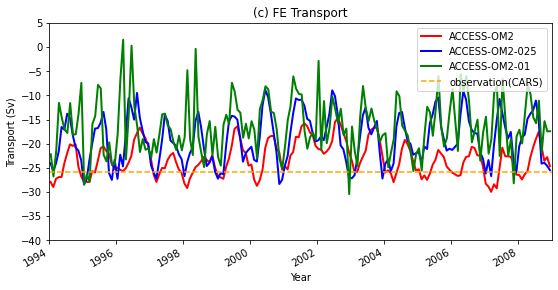

In [12]:
def Strait_Transport_2000(St,obs,tmin,tmax):
    
    fig,ax = plt.subplots(figsize=(9,4))

    for i,ekey in enumerate(data.keys()):
        if 3 <= i and i <= 5:               # set i
            print(ekey)
            e = data[ekey]
            transport_mean = e['transport_mean'][St]/1e6/1036
            transport_mean.plot(label=e['desc'], color = c[i], linewidth=2)

    ax.plot([tstart,tend],[obs, obs],color = 'orange', linestyle = '--',label="observation(CARS)")
    # ax.legend(fancybox=True, framealpha=0.75)
    ax.legend(loc = 1)
    ax.set_ylim([tmin, tmax])
    ax.set_xlim([pd.datetime(1994,1,1),pd.datetime(2009,1,1)])
    ax.set_title('(c) ' + str(St) + ' Transport')
    ax.set_xlabel('Year')
    ax.set_ylabel('Transport (Sv)')

    savefigure(str(St)+'_transport_'+ 'cycle2')       # set cycle
    
St = 'FE'
for i,ekey in enumerate(data.keys()):
    if 3 <= i and i <= 5: 
        e = data[ekey]
        e['transport'] = dict()
        e['transport_mean'] = dict()
        for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
            if strait == St:
                if strait not in e['transport']:
                    if xmin == xmax:
                        e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                            .sel(time=slice(tstart,tend))\
                                            .sel(yt_ocean=slice(ymin, ymax))\
                                            .sum('yt_ocean')
                    elif ymin == ymax:
                        e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                            .sel(time=slice(tstart,tend))\
                                            .sel(xt_ocean=slice(xmin, xmax))\
                                            .sum('xt_ocean')
                    else:
                        raise ValueError('Transports are computed only along lines of either constant latitude or longitude')

                print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')

                if strait not in e['transport_mean']:
                    e['transport_mean'][strait] = e['transport'][strait]
                    #.resample(time='A').mean('time')
                
Strait_Transport_2000('FE',-25.8,-40,5)

ED 1.8332038918918918 Sv
ED 4.796713513513513 Sv
ED 4.287303166023166 Sv
1deg_c2
025deg_c2
01deg_c2


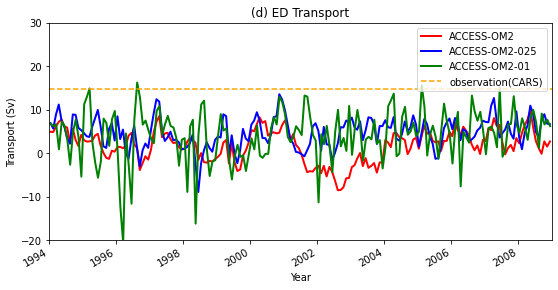

In [13]:
def Strait_Transport_2000(St,obs,tmin,tmax):
    
    fig,ax = plt.subplots(figsize=(9,4))

    for i,ekey in enumerate(data.keys()):
        if 3 <= i and i <= 5:               # set i 
            print(ekey)
            e = data[ekey]
            transport_mean = e['transport_mean'][St]/1e6/1036
            transport_mean.plot(label=e['desc'], color = c[i], linewidth=2)

    ax.plot([tstart,tend],[obs, obs],color = 'orange', linestyle = '--',label="observation(CARS)")
    # ax.legend(fancybox=True, framealpha=0.75)
    ax.legend(loc = 1)
    ax.set_ylim([tmin, tmax])
    ax.set_xlim([pd.datetime(1994,1,1),pd.datetime(2009,1,1)])
    ax.set_title('(d) ' + str(St) + ' Transport')
    ax.set_xlabel('Year')
    ax.set_ylabel('Transport (Sv)')

    savefigure(str(St)+'_transport_'+ 'cycle2')       # set cycle
    
St = 'ED'
for i,ekey in enumerate(data.keys()):
    if 3 <= i and i <= 5: 

        e = data[ekey]
        e['transport'] = dict()
        e['transport_mean'] = dict()
        for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
            if strait == St:
                if strait not in e['transport']:
                    if xmin == xmax:
                        e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                            .sel(time=slice(tstart,tend))\
                                            .sel(yt_ocean=slice(ymin, ymax))\
                                            .sum('yt_ocean')
                    elif ymin == ymax:
                        e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                            .sel(time=slice(tstart,tend))\
                                            .sel(xt_ocean=slice(xmin, xmax))\
                                            .sum('xt_ocean')
                    else:
                        raise ValueError('Transports are computed only along lines of either constant latitude or longitude')

                print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')

                if strait not in e['transport_mean']:
                    e['transport_mean'][strait] = e['transport'][strait]
                    #.resample(time='A').mean('time')


Strait_Transport_2000('ED',14.8,-20,30)

DG 22.81968778378378 Sv
DG 10.460257853281853 Sv
DG 5.512284416988416 Sv
1deg_c2
025deg_c2
01deg_c2


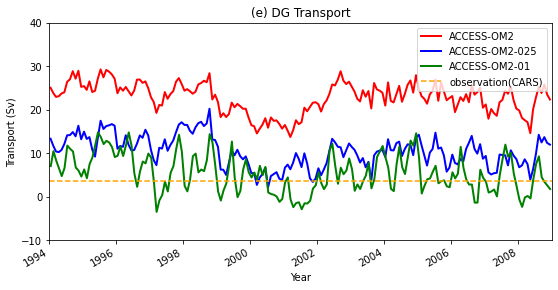

In [14]:
def Strait_Transport_2000(St,obs,tmin,tmax):
    
    fig,ax = plt.subplots(figsize=(9,4))

    for i,ekey in enumerate(data.keys()):
        if 3 <= i and i <= 5:               # set i
            print(ekey)
            e = data[ekey]
            transport_mean = e['transport_mean'][St]/1e6/1036
            transport_mean.plot(label=e['desc'], color = c[i], linewidth=2)

    ax.plot([tstart,tend],[obs, obs],color ='orange', linestyle = '--',label="observation(CARS)")
    # ax.legend(fancybox=True, framealpha=0.75)
    ax.legend(loc = 1)
    ax.set_ylim([tmin, tmax])
    ax.set_xlim([pd.datetime(1994,1,1),pd.datetime(2009,1,1)])
    ax.set_title('(e) ' + str(St) + ' Transport')
    ax.set_xlabel('Year')
    ax.set_ylabel('Transport (Sv)')

    savefigure(str(St)+'_transport_'+ 'cycle2')       # set cycle
    
St = 'DG'
for i,ekey in enumerate(data.keys()):
    if 3 <= i and i <= 5: 
        e = data[ekey]
        e['transport'] = dict()
        e['transport_mean'] = dict()
        for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
            if strait == St:
                if strait not in e['transport']:
                    if xmin == xmax:
                        e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                            .sel(time=slice(tstart,tend))\
                                            .sel(yt_ocean=slice(ymin, ymax))\
                                            .sum('yt_ocean')
                    elif ymin == ymax:
                        e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                            .sel(time=slice(tstart,tend))\
                                            .sel(xt_ocean=slice(xmin, xmax))\
                                            .sum('xt_ocean')
                    else:
                        raise ValueError('Transports are computed only along lines of either constant latitude or longitude')

                print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')

                if strait not in e['transport_mean']:
                    e['transport_mean'][strait] = e['transport'][strait]
                    #.resample(time='A').mean('time')


Strait_Transport_2000('DG',3.7,-10,40)

LM -24.128935042471042 Sv
LM -14.98615203088803 Sv
LM -10.340762193050193 Sv
1deg_c2
025deg_c2
01deg_c2


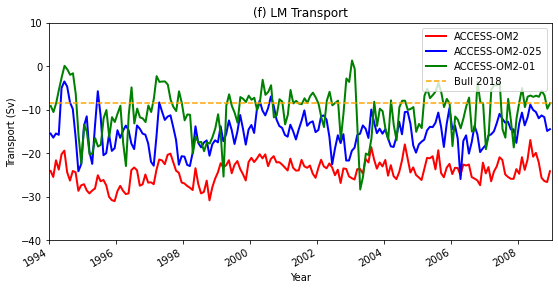

In [15]:
def Strait_Transport_2000(St,obs,tmin,tmax):
    
    fig,ax = plt.subplots(figsize=(9,4))

    for i,ekey in enumerate(data.keys()):
        if 3 <= i and i <= 5:              # set i
            print(ekey)
            e = data[ekey]
            transport_mean = e['transport_mean'][St]/1e6/1036
            transport_mean.plot(label=e['desc'], color = c[i], linewidth=2)

    ax.plot([tstart,tend],[obs, obs],color = 'orange', linestyle = '--',label="Bull 2018")
    # ax.legend(fancybox=True, framealpha=0.75)
    ax.legend(loc = 1)
    ax.set_ylim([tmin, tmax])
    ax.set_xlim([pd.datetime(1994,1,1),pd.datetime(2009,1,1)])
    ax.set_title('(f) ' + str(St) + ' Transport')
    ax.set_xlabel('Year')
    ax.set_ylabel('Transport (Sv)')

    savefigure(str(St)+'_transport_'+ 'cycle2')       # set cycle
    
    
St = 'LM'
for i,ekey in enumerate(data.keys()):
    if 3 <= i and i <= 5: 
        e = data[ekey]
        e['transport'] = dict()
        e['transport_mean'] = dict()
        for strait, (xmin, xmax, ymin, ymax) in e['straits'].items():
            if strait == St:
                if strait not in e['transport']:
                    if xmin == xmax:
                        e['transport'][strait] = e['tx_trans_int_2000'].sel(xu_ocean=xmin, method='nearest')\
                                            .sel(time=slice(tstart,tend))\
                                            .sel(yt_ocean=slice(ymin, ymax))\
                                            .sum('yt_ocean')
                    elif ymin == ymax:
                        e['transport'][strait] = e['ty_trans_int_2000'].sel(yu_ocean=ymin, method='nearest')\
                                            .sel(time=slice(tstart,tend))\
                                            .sel(xt_ocean=slice(xmin, xmax))\
                                            .sum('xt_ocean')
                    else:
                        raise ValueError('Transports are computed only along lines of either constant latitude or longitude')

                print(strait, e['transport'][strait].mean('time').values/1e6/1036, 'Sv')

                if strait not in e['transport_mean']:
                    e['transport_mean'][strait] = e['transport'][strait]
                    #.resample(time='A').mean('time')


Strait_Transport_2000('LM',-8.4,-40,10)

## ITF

In [22]:
# ITF:1958.1-2018.12
tstart = pd.to_datetime('1958/01/01')
tend = pd.to_datetime('2018/12/31')

In [23]:
def Strait_Transport_fulldepth(St,obs,tmin,tmax):

    fig,ax = plt.subplots(figsize=(9,4))

    for i,ekey in enumerate(data.keys()):
        if 0 <= i and i <= 2:                         # set i
            print(ekey)
            e = data[ekey]
            transport_mean = e['transport_mean'][St]/1e6/1036
            transport_mean.plot(label=e['desc'], linewidth=2)

    ax.plot([tstart,tend],[obs,obs ],'k--',label="INSTANT (2004-2006)")
    # ax.legend(fancybox=True, framealpha=0.75)
    ax.legend(loc = 1)
    ax.set_ylim([tmin,tmax])
    ax.set_xlim([pd.datetime(1958,1,1),pd.datetime(2018,12,31)])
    ax.set_title(str(St) + ' Transport')
    ax.set_xlabel('Year')
    ax.set_ylabel('Transport (Sv)')

    savefigure(str(St)+'_transport_'+ 'cycle1')     # set cycle

In [24]:
Strait_Transport_fulldepth('Lombok Strait',-2.6,-6,0)
Strait_Transport_fulldepth('Ombai Strait',-4.9,-6,2)
Strait_Transport_fulldepth('Timor Strait',-7.5,-10,0)

In [28]:
# for total ITF trans

fig,ax = plt.subplots(figsize=(9,4))

for i,ekey in enumerate(data.keys()):
    if 0 <= i and i <= 2:                         # set i
        print(ekey)
        e = data[ekey]
        transport_mean = (e['transport_mean']['Lombok Strait']+
                          e['transport_mean']['Ombai Strait']+
                          e['transport_mean']['Timor Strait'])/1e6/1036
        transport_mean.plot(label=e['desc'], linewidth=2)

ax.plot([tstart,tend],[-15, -15],'k--',label="INSTANT (2004-2006)")
# ax.legend(fancybox=True, framealpha=0.75)
ax.legend(loc = 1)
ax.set_ylim([-16, 0])
ax.set_xlim([pd.datetime(1957,12,31),pd.datetime(2018,11,30)])
ax.set_title('Total Transport')
ax.set_xlabel('Year')
ax.set_ylabel('Transport (Sv)')



savefigure('Total_transport_cycle1')             # set cycle